In [3]:
%matplotlib inline
import numpy as np
from numpy import random
import tensorflow as tf

# fix random seed for reproducibility
#seed = 7
#np.random.seed(seed)
#####################################
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
#####################################

import matplotlib
from matplotlib import pyplot as plt
import cv2
import base64
import os
from PIL import Image
import matplotlib.image as mpimg
import os

from keras.models import *
from keras.layers import Input, merge, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from skimage.transform import resize
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.feature_extraction.image import extract_patches_2d

from keras import backend as K


In [4]:
#produce binary masks for training, resize all the masks to 500X500 
def Label_to_BinLabel(source, size):
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #print(img.shape)
        #cv2.imwrite(source+str(j)+'.png', thresh)#final mask
        #img4 = cv2.imread(source+str(j)+'.png')
        img4 = cv2.resize(img,(500, 500))
        ret,thresh = cv2.threshold(img4,0,255,cv2.THRESH_BINARY)
        print(thresh)
        print(thresh.shape)
        print('_'*40)
        cv2.imwrite("/home/hp/data/Train/label1/%d.png"%(j),thresh)
        

In [5]:
list = os.listdir('/home/hp/data/Train/label') # dir is your directory path
number_files = len(list)
print (number_files)

Label_to_BinLabel('/home/hp/data/Train/label/', number_files)

24
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(500, 500)
________________________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(500, 500)
________________________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(500, 500)
________________________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(500, 500)
________________________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(500, 500)
________________________________________
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   

In [6]:
#resize all of 23 train images to 500X500
def Resize_images(source, size):
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')        
        img = cv2.resize(img,(500, 500))
        print(img)
        print(img.shape)
        cv2.imwrite("/home/hp/data/Train/image1/%d.png"%(j),img)

In [7]:
list = os.listdir('/home/hp/data/Train/image') # dir is your directory path
number_files = len(list)
print (number_files)

Resize_images('/home/hp/data/Train/image/', number_files)

24
[[[185 165 211]
  [205 197 234]
  [211 195 236]
  ...
  [178 150 212]
  [178 147 216]
  [167 136 203]]

 [[182 160 204]
  [191 178 210]
  [209 190 228]
  ...
  [174 146 210]
  [172 140 210]
  [159 127 194]]

 [[180 155 197]
  [182 162 193]
  [202 176 212]
  ...
  [169 138 202]
  [174 140 208]
  [181 147 214]]

 ...

 [[236 218 241]
  [218 200 223]
  [199 181 204]
  ...
  [233 215 238]
  [251 231 248]
  [230 202 244]]

 [[242 224 247]
  [228 210 233]
  [212 193 215]
  ...
  [251 246 235]
  [241 228 229]
  [199 171 218]]

 [[242 226 249]
  [229 210 231]
  [218 197 218]
  ...
  [243 233 235]
  [210 190 212]
  [174 145 199]]]
(500, 500, 3)
[[[171 126 193]
  [155 117 195]
  [148 107 191]
  ...
  [157 111 184]
  [159 114 183]
  [169 125 191]]

 [[166 123 187]
  [153 115 183]
  [150 110 190]
  ...
  [162 119 191]
  [164 121 192]
  [174 134 202]]

 [[156 100 176]
  [151 102 183]
  [156 111 198]
  ...
  [169 132 204]
  [170 132 208]
  [177 144 217]]

 ...

 [[202 151 205]
  [203 152 197]
  [

[[[136  79 130]
  [134  78 127]
  [133  77 126]
  ...
  [177 143 208]
  [194 160 225]
  [193 159 224]]

 [[136  78 132]
  [132  76 127]
  [130  74 123]
  ...
  [173 139 204]
  [184 149 216]
  [185 151 216]]

 [[134  77 132]
  [129  75 128]
  [128  72 123]
  ...
  [160 125 192]
  [163 127 197]
  [170 135 202]]

 ...

 [[142 103 188]
  [129  91 173]
  [138  98 180]
  ...
  [180 152 221]
  [180 149 218]
  [184 153 220]]

 [[141 103 185]
  [135  97 179]
  [153 114 194]
  ...
  [176 148 217]
  [179 148 217]
  [186 155 222]]

 [[147 109 191]
  [147 110 190]
  [169 130 210]
  ...
  [169 141 210]
  [175 144 213]
  [184 153 220]]]
(500, 500, 3)
[[[137  74 166]
  [151  89 179]
  [170 106 196]
  ...
  [143  91 145]
  [144  92 146]
  [147  95 149]]

 [[136  73 165]
  [145  82 174]
  [156  94 184]
  ...
  [134  82 136]
  [137  82 137]
  [138  86 140]]

 [[139  77 171]
  [141  80 171]
  [145  84 174]
  ...
  [134  79 136]
  [137  79 137]
  [138  83 140]]

 ...

 [[120  55 100]
  [126  61 106]
  [136

In [8]:
#Extracting 5 patches of size 256X256 from each image

path = '/home/hp/data/Train/image1/'
path1 = '/home/hp/data/Train/label1/'
list = os.listdir('/home/hp/data/Train/image1') # dir is your directory path
size = len(list)
print (size)

patch_size = (256, 256)

k=1
for i in range(1, size+1):
    img = cv2.imread(path+str(i)+'.png')
    img1 = cv2.imread(path1+str(i)+'.png')
    data = extract_patches_2d(img, patch_size, max_patches=5,random_state=1)
    data1 = extract_patches_2d(img1, patch_size, max_patches=5,random_state=1)
    print(data.shape)
    print(data1.shape)
    data = np.array(data) 
    data1 = np.array(data1) 
    print(data.shape)
    print(data1.shape)
    print('-'*30)
    #print(data.shape)
    #print(data1.shape)
    for j in range(data.shape[0]):
        img = data[j]
        img1 = data1[j]
        img = array_to_img(img)
        img1 = array_to_img(img1)
        img.save("/home/hp/patch_image/%d.png"%(k))
        img1.save("/home/hp/patch_label/%d.png"%(k))
        k = k+1

24
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
(5, 256, 256, 3)
------------------------------
(5, 256

In [9]:
#augmentation

batch_size = 16

datagen = ImageDataGenerator(
        rotation_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest')

In [10]:
#augmentation

seed = 1

path = '/home/hp/patch_image/'
path2 = '/home/hp/patch_label/'
list = os.listdir('/home/hp/patch_image/') # dir is your directory path
size = len(list)
print (size)

for i in range(1, size+1):
        img = load_img(path+str(i)+'.png')   
        x = img_to_array(img)  
        x = x.reshape((1,) + x.shape)  
        
        img2 = load_img(path2+str(i)+'.png')  
        y = img_to_array(img2)  
        y = y.reshape((1,) + y.shape)  

        # the .flow() command below generates batches of randomly transformed images
        # and saves the results to the `preview/` directory
        j = 0
        for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/home/hp/data/Train/image2', save_format='png', seed = seed):
            j += 1
            if j > 30:
                break  
                
        j = 0
        for batch in datagen.flow(y, batch_size=1,
                          save_to_dir='/home/hp/data/Train/label2', save_format='png', seed = seed):
            j += 1
            if j > 30:
                break  
        
        seed +=2293


120


In [11]:
#renaming the files in a folder

path = '/home/hp/data/Train/image2'
files = os.listdir(path)
i = 1

for file in files:
    os.rename(os.path.join(path, file), os.path.join(path, str(i)+'.png'))
    i = i+1
    
path = '/home/hp/data/Train/label2'
files = os.listdir(path)
i = 1

for file in files:
    os.rename(os.path.join(path, file), os.path.join(path, str(i)+'.png'))
    i = i+1 

In [12]:
#Conversion of masks to numpy array

def Conv_to_NumArr(source, size):
    temp_arr = []
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
        temp_arr.append(thresh)
        #print(type(img))
    temp = np.array(temp_arr)#https://stackoverflow.com/questions/9775297/append-a-numpy-array-to-a-numpy-array
    return temp 


list = os.listdir('/home/hp/data/Train/label2') # dir is your directory path
number_files = len(list)
print (number_files)

Train_data_mask = Conv_to_NumArr('/home/hp/data/Train/label2/', number_files)
print(Train_data_mask)
print(Train_data_mask.shape)
print('-'*60)

3115
[[[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]
  [255 255 255 ...   0   0   0]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0 

In [13]:
#Conversion of images to numpy array

def Conv_to_NumArr(source, size):
    temp_arr = []
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #ret,thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY)
        temp_arr.append(img)
        #print(type(img))
    temp = np.array(temp_arr)#https://stackoverflow.com/questions/9775297/append-a-numpy-array-to-a-numpy-array
    return temp 

list = os.listdir('/home/hp/data/Train/image2') # dir is your directory path
number_files = len(list)
print (number_files)

Train_data_image = Conv_to_NumArr('/home/hp/data/Train/image2/', number_files)
print(Train_data_image)
print(Train_data_image.shape)
print('-'*60)

3115
[[[ 87  83  82 ...  78  78  78]
  [ 87  83  82 ...  78  78  78]
  [ 87  83  82 ...  78  78  78]
  ...
  [119 111 103 ...  95  95  95]
  [106 106 106 ...  94  94  94]
  [ 90 100 108 ...  97  97  97]]

 [[156 149 132 ... 138 134 135]
  [155 155 138 ... 140 139 144]
  [142 136 121 ... 148 148 154]
  ...
  [ 71  75  78 ... 124 127 130]
  [ 68  71  72 ... 124 127 130]
  [ 68  71  72 ... 124 127 130]]

 [[156 156 156 ... 163 174 184]
  [163 163 163 ... 156 166 176]
  [163 163 163 ... 147 155 168]
  ...
  [134 134 134 ... 160 171 175]
  [134 134 134 ... 160 171 175]
  [134 134 134 ... 160 171 175]]

 ...

 [[ 48  48  46 ... 111 111 111]
  [ 48  48  48 ... 106 106 106]
  [ 48  48  49 ... 107 107 107]
  ...
  [126 130 133 ... 114 114 114]
  [127 124 126 ... 123 123 123]
  [128 124 127 ... 133 133 133]]

 [[101 102 111 ...  68  68  68]
  [101 102 111 ...  68  68  68]
  [101 102 111 ...  68  68  68]
  ...
  [ 77  89  88 ...  97  97  97]
  [ 70  89  91 ...  97  97  97]
  [ 72  86  88 ...  97 

In [14]:
#Resizing the test images

def Resize_test(source, size):
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        img = cv2.resize(img,(256, 256))
        cv2.imwrite("/home/hp/data/Test/image1/%d.png"%(j),img)

In [15]:
list = os.listdir('/home/hp/data/Test/image') # dir is your directory path
number_files = len(list)
print (number_files)

Resize_test('/home/hp/data/Test/image/', number_files)

8


In [16]:
#produce binary masks for testing, resize all the masks to 256X256 
def Test_to_BinLabel(source, size):
    for j in range(1,size+1): 
        img = cv2.imread(source+str(j)+'.png')
        #img1=img[:,:,2]
        #img2=(img1!=0)
        #plt.imsave(source+str(j)+'.png', ~img[:,:,2], cmap=plt.cm.gray)#grey inverse
        #img3 = cv2.imread(source+str(j)+'.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        #cv2.imwrite(source+str(j)+'.png', thresh)#final mask
        #img4 = cv2.imread(source+str(j)+'.png')
        img4 = cv2.resize(img,(256, 256))
        ret,thresh = cv2.threshold(img4,0,255,cv2.THRESH_BINARY)
        print(thresh)
        print(thresh.shape)
        print('_'*30)
        cv2.imwrite("/home/hp/data/Test/label1/%d.png"%(j),thresh)

In [17]:
list = os.listdir('/home/hp/data/Test/label') # dir is your directory path
number_files = len(list)
print (number_files)

Test_to_BinLabel('/home/hp/data/Test/label/', number_files)

8
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ...   0 255 255]]
(256, 256)
______________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(256, 256)
______________________________
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]]
(256, 256)
______________________________
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
(256, 256)
______________________________
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(256, 256)
___

In [18]:
list = os.listdir('/home/hp/data/Test/image1') # dir is your directory path
number_files = len(list)
print (number_files)

Test_data_image = Conv_to_NumArr('/home/hp/data/Test/image1/', number_files)
print(Test_data_image)
print(Test_data_image.shape)

8
[[[201 189 175 ... 188 183 198]
  [198 186 175 ... 186 186 215]
  [206 186 177 ... 182 184 221]
  ...
  [199 205 204 ... 121 102  94]
  [209 212 211 ... 132 102  89]
  [173 177 195 ... 152 109  87]]

 [[238 238 238 ... 100 200 238]
  [238 238 238 ... 128 229 244]
  [238 238 238 ... 163 244 247]
  ...
  [ 57  68  91 ... 122 126 125]
  [ 66  59  67 ... 123 123 130]
  [ 70  54  53 ... 133 134 139]]

 [[129 113 123 ...  71  76  74]
  [129 109 130 ...  68  70  67]
  [124 111 124 ...  65  66  64]
  ...
  [108 138  83 ... 108  80  97]
  [ 95  97  52 ... 116 126  95]
  [ 90  74  33 ... 106 125 111]]

 ...

 [[164 192 171 ... 149 142 148]
  [176 182 171 ... 130 142 156]
  [167 166 159 ... 112 124 136]
  ...
  [216 216 216 ... 191 190 168]
  [217 217 216 ... 145 138 126]
  [218 218 217 ... 142 144 137]]

 [[121 118 110 ... 184 191 202]
  [112 117 112 ... 205 210 219]
  [111 115 108 ... 188 203 213]
  ...
  [207 192 170 ... 172 140 174]
  [210 184 185 ... 174 147 163]
  [201 182 205 ... 179 146

******* Train_data_image2 ********
[[[[-1.1882689 ]
   [-1.2801971 ]
   [-1.3031793 ]
   ...
   [-1.3951076 ]
   [-1.3951076 ]
   [-1.3951076 ]]

  [[-1.1882689 ]
   [-1.2801971 ]
   [-1.3031793 ]
   ...
   [-1.3951076 ]
   [-1.3951076 ]
   [-1.3951076 ]]

  [[-1.1882689 ]
   [-1.2801971 ]
   [-1.3031793 ]
   ...
   [-1.3951076 ]
   [-1.3951076 ]
   [-1.3951076 ]]

  ...

  [[-0.4528421 ]
   [-0.6366988 ]
   [-0.82055545]
   ...
   [-1.0044122 ]
   [-1.0044122 ]
   [-1.0044122 ]]

  [[-0.7516092 ]
   [-0.7516092 ]
   [-0.7516092 ]
   ...
   [-1.0273943 ]
   [-1.0273943 ]
   [-1.0273943 ]]

  [[-1.1193225 ]
   [-0.8895017 ]
   [-0.705645  ]
   ...
   [-0.958448  ]
   [-0.958448  ]
   [-0.958448  ]]]


 [[[ 0.39749515]
   [ 0.23662053]
   [-0.15407495]
   ...
   [-0.01618242]
   [-0.10811077]
   [-0.08512869]]

  [[ 0.37451306]
   [ 0.37451306]
   [-0.01618242]
   ...
   [ 0.02978175]
   [ 0.00679966]
   [ 0.1217101 ]]

  [[ 0.07574593]
   [-0.0621466 ]
   [-0.4068779 ]
   ...
   [ 0.213

/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:53: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:59: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:65: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concate

got unet
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 32) 9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 32) 0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
c


Epoch 00010: loss improved from 0.04049 to 0.03795, saving model to unet.hdf5
Epoch 11/35
 - 7408s - loss: 0.0357 - binary_accuracy: 0.9846 - val_loss: 0.0424 - val_binary_accuracy: 0.9824

Epoch 00011: loss improved from 0.03795 to 0.03570, saving model to unet.hdf5
Epoch 12/35
 - 7488s - loss: 0.0333 - binary_accuracy: 0.9856 - val_loss: 0.0418 - val_binary_accuracy: 0.9824

Epoch 00012: loss improved from 0.03570 to 0.03326, saving model to unet.hdf5
Epoch 13/35
 - 8826s - loss: 0.0347 - binary_accuracy: 0.9852 - val_loss: 0.0396 - val_binary_accuracy: 0.9836

Epoch 00013: loss did not improve
Epoch 14/35
 - 8623s - loss: 0.0296 - binary_accuracy: 0.9872 - val_loss: 0.0385 - val_binary_accuracy: 0.9841

Epoch 00014: loss improved from 0.03326 to 0.02958, saving model to unet.hdf5
Epoch 15/35
 - 8133s - loss: 0.0299 - binary_accuracy: 0.9871 - val_loss: 0.0388 - val_binary_accuracy: 0.9841

Epoch 00015: loss did not improve
Epoch 16/35
 - 7929s - loss: 0.0285 - binary_accuracy: 0.98

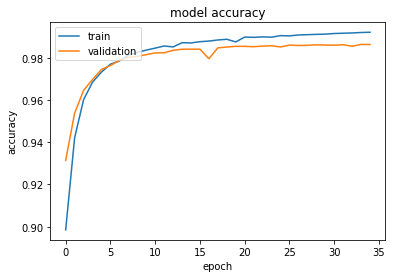

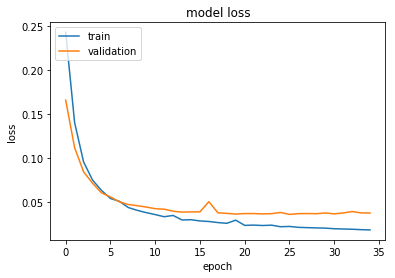

array to image


In [19]:
#Defining the U-Net model

#class myUnet(object):

img_rows = 256
img_cols = 256
smooth = 1


'''def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return (1-dice_coef(y_true, y_pred))'''
        
def get_unet():

        #inputs = Input((self.img_rows, self.img_cols,3))
        inputs = Input((img_rows, img_cols, 1))
        
        conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
        print("conv1 shape:",conv1.shape)
        conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
        #print( "conv1 shape:",conv1.shape)
        pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
        print("pool1 shape:",pool1.shape)
        
        conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
        print( "conv2 shape:",conv2.shape)
        conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
       # print( "conv2 shape:",conv2.shape)
        #drop2 = Dropout(0.5)(conv2)
        pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
        print( "pool2 shape:",pool2.shape)
        
        conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
        print("conv3 shape:",conv3.shape)
        conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
        #print("conv3 shape:",conv3.shape)
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
        #print("pool3 shape:",pool3.shape)
        #drop3 = Dropout(0.5)(conv3)
        
        conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
        print("conv3 shape:",conv3.shape)
        conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
        #pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
        
        up5 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv4))
        merge5 = merge([conv3,up5], mode = 'concat', concat_axis = 3)
        conv5 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge5)
        #drop4 = Dropout(0.1)(conv4)
        conv5 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
        
        up6 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv5))
        merge6 = merge([conv2,up6], mode = 'concat', concat_axis = 3)
        conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
        #drop5 = Dropout(0.1)(conv5)
        conv6 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
        
        up7 = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
        merge7 = merge([conv1,up7], mode = 'concat', concat_axis = 3)
        conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
        #drop5 = Dropout(0.1)(conv5)
        conv7 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
      
        conv8 = Conv2D(1, (1, 1), activation='sigmoid')(conv7)
        
        model = Model(input = inputs, output = conv8)

        #model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
                
        optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0)
        #model.compile(optimizer = optimizer, loss = dice_coef_loss, metrics=[dice_coef])
        model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['binary_accuracy'])

        return model
    
'''def resize_arr(imgs):
        imgsp = np.ndarray((1,imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
        for i in range(imgs.shape[0]):
            imgsp[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)
        #imgsp = imgsp[..., np.newaxis]
        imgsp = np.expand_dims(imgsp, axis=1)
        return imgsp'''
    
def resize_arr(imgs):
        imgsp = imgs.reshape((imgs.shape[0], img_cols, img_rows, 1))
        return imgsp
    
def train():

        #print("loading data")
        #imgs_train, imgs_mask_train, imgs_test = self.load_data()
        #print("loading data done")
        Train_data_image2 = resize_arr(Train_data_image)
        Train_data_mask2 = resize_arr(Train_data_mask)
        
        Train_data_image2 = Train_data_image2.astype('float32')
        mean = np.mean(Train_data_image2)  # mean for data centering
        std = np.std(Train_data_image2)  # std for data normalization

        Train_data_image2 -= mean
        Train_data_image2 /= std
        print("******* Train_data_image2 ********")
        print(Train_data_image2)
        print(Train_data_image2.shape)

        Train_data_mask2  = Train_data_mask2.astype('float32')
        Train_data_mask2  /= 255. # scale masks to [0, 1]
        print("******* Train_data_mask2 ********")
        print(Train_data_mask2)
        print(Train_data_mask2.shape)
        
        #np.reshape(a, (2, 3)) 
        #np.reshape(Train_data_image[0][0], (512, 512, 3)) 
            
        model = get_unet()
        print("got unet")
        model.summary()

        model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss',verbose=1, save_best_only=True)
        print('Fitting model...')
        history = model.fit(Train_data_image2, Train_data_mask2, batch_size=1, nb_epoch=35, verbose=2, validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])
        
        #model.load_weights('unet.hdf5')
        
        Test_data_image2 = resize_arr(Test_data_image)
            
        Test_data_image2 =  Test_data_image2.astype('float32')
        Test_data_image2 -= mean
        Test_data_image2 /= std 
        
        #Test_data_mask2 = resize_arr(Test_data_mask)
            
        #Test_data_mask2  = Test_data_mask2.astype('float32')
        #Test_data_mask2  /= 255.
        
        print('predict test data')
        Test_data_mask_predict = model.predict(Test_data_image2, batch_size=1, verbose=1)
        #print(Test_data_mask_predict)
        #Test_data_mask_predict[Test_data_mask_predict>0.5]=1
        #Test_data_mask_predict[Test_data_mask_predict<=0.5]=0
        #print(Test_data_mask_predict)
        np.save('/home/hp/data/Test_data_mask_predict.npy', Test_data_mask_predict)
        segmented_img = np.load('/home/hp/data/Test_data_mask_predict.npy')
        print("***** segmented_img before thresholding *****")
        print(segmented_img)
        print('-'*60)
        segmented_img[segmented_img>0.5] = 1
        segmented_img[segmented_img<=0.5] = 0
        print("***** segmented_img after thresholding *****")
        print(segmented_img)
        np.save('/home/hp/data/segmented_img.npy', segmented_img)
       
        # list all data in history
        print(history.history.keys())
        # summarize history for accuracy
        plt.plot(history.history['binary_accuracy'])
        plt.plot(history.history['val_binary_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show() 
        
        
        # summarize history for accuracy
        '''plt.plot(history.history['dice_coef'])
        plt.plot(history.history['val_dice_coef'])
        plt.title('model accuracy')
        plt.ylabel('segmentation accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
        # summarize history for loss
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show() ''' 
        
def save_img():

        print("array to image")
        imgs = np.load('/home/hp/data/segmented_img.npy')
        for i in range(imgs.shape[0]):
            img = imgs[i]
            img = array_to_img(img)
            img.save("/home/hp/data/Result/%d.png"%(i+1))
            
#if __name__ == '__main__':
#myunet = myUnet()
#Train_data_image = myunet.resizei(Train_data_image)
#Train_data_mask = myunet.resizei(Train_data_mask)
#Test_data_image = myunet.resizei(Test_data_image)

train()
save_img()      

In [20]:
def dice_coef(seg, gt):
    if seg.shape != gt.shape:
        raise ValueError("Shape mismatch: seg and gt must have to be of the same shape.")
    else:
        intersection = np.logical_and(seg, gt)
        value = (2. * intersection.sum())  / (seg.sum() + gt.sum())
    return value

path = '/home/hp/data/Result/'
path2 = '/home/hp/data/Test/label1/'
list = os.listdir('/home/hp/data/Test/label1/') # dir is your directory path
size = len(list)
print (size)

accuracy = []

for j in range(1,size+1): 
    seg=mpimg.imread(path+str(j)+'.png')
    print("printing segmented_img")
    print(seg)
    seg = np.asarray(seg).astype(np.bool)
    print(seg)
    print('-'*80)
    print("printing test labels")
    gt=mpimg.imread(path2+str(j)+'.png')
    print(gt)
    gt = np.asarray(gt).astype(np.bool)
    print(gt)
    print('%'*80)
    value = dice_coef(seg, gt)
    accuracy.append(value)  
    
#print(accuracy)
accu = np.array(accuracy) 
print(accu)
print(accu.mean())

8
printing segmented_img
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False  True  True]
 [False False False ... False  True  True]
 [False False False ... False  True  True]]
--------------------------------------------------------------------------------
printing test labels
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ... False  True  True]]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%